In [106]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Plan  
- Divide each image into 9 equal chunks
- Compute the average of R, G and B for each chunk
- This gives 27 variables
- Fit some sort of model to these (nearest neighbours?)

In [101]:
#Read an example image and convert to RGB for matplotlib
img=cv2.imread("data/us.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

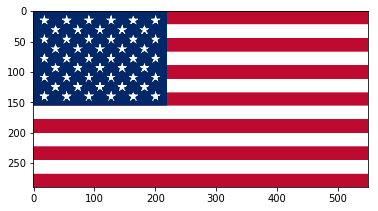

In [103]:
#Check dimensions
img.shape

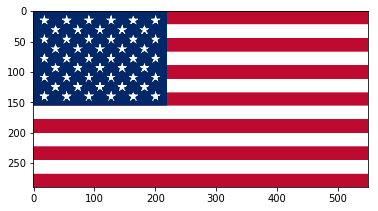

In [102]:
#Show the image
plt.imshow(img)

In [104]:
 edges = cv2.Canny(img,100,200)

(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

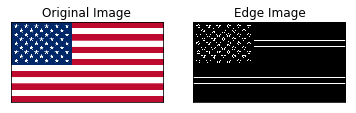

In [105]:
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])